In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification

# 랜덤 시드 고정
np.random.seed(42)

# 분류용 기본 데이터 생성
X, y = make_classification(
    n_samples=1000, 
    n_features=8, 
    n_informative=5, 
    n_redundant=2, 
    n_classes=2, 
    random_state=42
)

# 기본 특성 이름 설정
columns = ['age', 'income', 'credit_score', 'satisfaction', 'debt_ratio', 'education_years', 'loan_amount', 'spending_score']
df = pd.DataFrame(X, columns=columns)
df['target'] = y

# 일부 컬럼 결측치 추가
df.loc[df.sample(frac=0.1).index, 'income'] = np.nan
df.loc[df.sample(frac=0.05).index, 'credit_score'] = np.nan

# 범주형 변수 추가
df['gender'] = np.random.choice(['Male', 'Female'], size=len(df))
df['region'] = np.random.choice(['North', 'South', 'East', 'West'], size=len(df))

# 나이 값 정리 (양수로)
df['age'] = df['age'].abs() * 10 + 18
df['age'] = df['age'].astype(int)

# 저장
df.to_csv("student_data.csv", index=False)
print("연습용 데이터 'student_data.csv' 생성 완료!")

df.head()

연습용 데이터 'student_data.csv' 생성 완료!


,age,income,credit_score,satisfaction,debt_ratio,education_years,loan_amount,spending_score,target,gender,region
0,20,-0.164471,-0.705182,-0.015433,-0.078425,0.730461,0.363777,0.727296,0,Female,South
1,24,0.274936,-0.776536,-0.959132,-1.123291,-0.572504,-0.918580,0.073886,0,Male,South
2,51,-0.590640,-1.343470,6.169133,1.222753,1.439649,-1.715076,3.223089,1,Male,South
3,18,-0.032960,-0.723131,-1.063065,-0.201072,-0.770711,0.890636,-1.379626,1,Male,South
4,22,-0.914989,0.953398,-0.033631,-0.048063,-0.860909,0.511169,-0.449294,0,Male,West


In [2]:
# 필수 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# 모델 예시 (시험 당일 제공 모델에 맞게 선택)
from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

In [11]:
# 데이터 불러오기
df = pd.read_csv("student_data.csv")  # 실제 파일명으로 교체

# 데이터 구조 확인
print(df.shape)
df.head()

(1000, 11)


,age,income,credit_score,satisfaction,debt_ratio,education_years,loan_amount,spending_score,target,gender,region
0,20,-0.164471,-0.705182,-0.015433,-0.078425,0.730461,0.363777,0.727296,0,Female,South
1,24,0.274936,-0.776536,-0.959132,-1.123291,-0.572504,-0.918580,0.073886,0,Male,South
2,51,-0.590640,-1.343470,6.169133,1.222753,1.439649,-1.715076,3.223089,1,Male,South
3,18,-0.032960,-0.723131,-1.063065,-0.201072,-0.770711,0.890636,-1.379626,1,Male,South
4,22,-0.914989,0.953398,-0.033631,-0.048063,-0.860909,0.511169,-0.449294,0,Male,West


In [22]:
# 결측치 확인
print(df.isnull().sum())

# 결측치 처리 (평균 또는 최빈값 등으로 대체)
imputer = SimpleImputer(strategy="mean")
numerical_col = ['income', 'credit_score', 'satisfaction', 'debt_ratio', 'education_years', 'loan_amount', 'spending_score']
df[numerical_col] = imputer.fit_transform(df[numerical_col])  # 예시, 실제 컬럼명으로 수정

# 범주형 인코딩 (Label Encoding 예시)
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# 파생 변수 예시: 나이 구간 만들기
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 50, 100], labels=['Teen', 'Young', 'Adult', 'Senior'])

# 다시 인코딩
df['age_group'] = LabelEncoder().fit_transform(df['age_group'])

preprocessed_df = df.drop(columns=['age'])

preprocessed_df.head()

age                0
income             0
credit_score       0
satisfaction       0
debt_ratio         0
education_years    0
loan_amount        0
spending_score     0
target             0
gender             0
region             0
age_group          0
dtype: int64


,income,credit_score,satisfaction,debt_ratio,education_years,loan_amount,spending_score,target,gender,region,age_group
0,-0.164471,-0.705182,-0.015433,-0.078425,0.730461,0.363777,0.727296,0,0,2,3
1,0.274936,-0.776536,-0.959132,-1.123291,-0.572504,-0.918580,0.073886,0,1,2,3
2,-0.590640,-1.343470,6.169133,1.222753,1.439649,-1.715076,3.223089,1,1,2,1
3,-0.032960,-0.723131,-1.063065,-0.201072,-0.770711,0.890636,-1.379626,1,1,2,2
4,-0.914989,0.953398,-0.033631,-0.048063,-0.860909,0.511169,-0.449294,0,1,3,3


In [23]:
# 타겟 변수 지정
target_col = 'target'  # 실제 변수명으로 변경

X = df.drop(columns=[target_col])
y = df[target_col]

# 훈련/검증 데이터 분할 (8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [24]:
# 모델 정의
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.935
F1 Score: 0.934998374959374

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       100
           1       0.94      0.93      0.93       100

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.93       200
weighted avg       0.94      0.94      0.93       200



          Feature  Importance
7  spending_score    0.267029
3    satisfaction    0.167626
6     loan_amount    0.149210


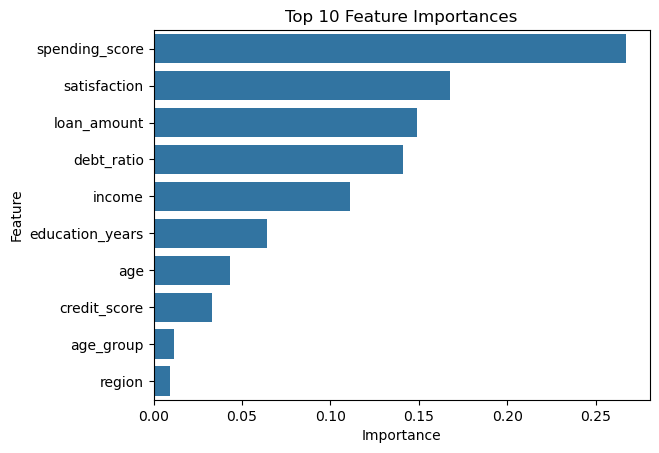

In [25]:
# 변수 중요도 시각화 (트리 계열 모델)
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 상위 3개 변수
print(importance_df.head(3))

# 시각화
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Feature Importances')
plt.show()


In [26]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)

# 튜닝 후 성능 평가
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

print("F1 Score (Before):", f1_score(y_test, y_pred, average='macro'))
print("F1 Score (After):", f1_score(y_test, y_pred_tuned, average='macro'))


Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}
F1 Score (Before): 0.934998374959374
F1 Score (After): 0.93999399939994


In [ ]:
# 훈련 성능과 테스트 성능 비교
print("Train Accuracy:", best_model.score(X_train, y_train))
print("Test Accuracy:", best_model.score(X_test, y_test))

# 교차검증으로 과적합 방지 예시
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-val Accuracy Mean:", np.mean(cv_scores))


In [ ]:
# 실제 활용 예시 작성 (주석)
"""
이 모델은 예를 들어 고객 이탈 예측, 이상 거래 탐지, 질병 분류 등 다양한 분류 문제에 활용될 수 있다.

모델 성능 향상을 위한 데이터 측면 제안:
1. 더 다양한 외부 피처 (예: 지역, 시간대 등) 결합
2. 이상치 제거 및 스케일 조정으로 노이즈 감소
"""


In [ ]:
# 파일로 저장
import joblib
joblib.dump(best_model, 'final_model.pkl')
